In [2]:
import numpy as np
import copy
import torch 
from torch import nn
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import os
import wandb 
from copy import deepcopy
from torch.utils.data import Dataset
import pandas as pd
from PIL import Image

# Image Synthesis Results

Given the dataloading technique presented in the `dataloading.ipynb` notebook, we show some quick samples from our conditional model. The inpainting model is also applied to different masks or situations not seen in training to test its generalization capabilities.

## Class Conditional Animal Face Generation

<u>**Samples:**</u>

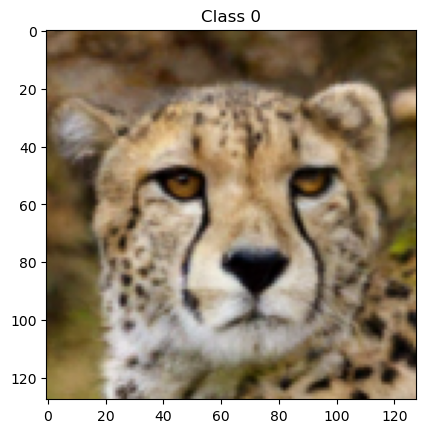

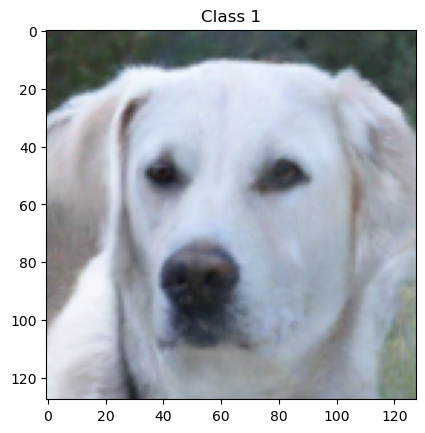

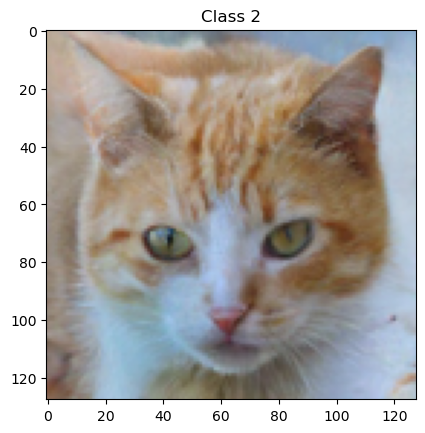

In [3]:
path_to_dataset = "/Users/gonzalo/Desktop/afq/"
image_files = os.listdir(path_to_dataset)
for idx in range(3):
    img_path = os.path.join(path_to_dataset, image_files[idx])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Class {idx}")
    plt.show()

## Landscape Image Inpainting

<u>**Samples:**</u>

![inpaint_demo](img/inpainting_demo.png)

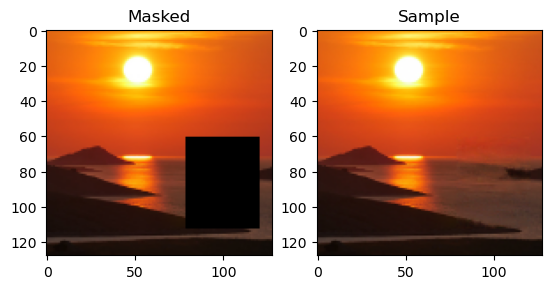

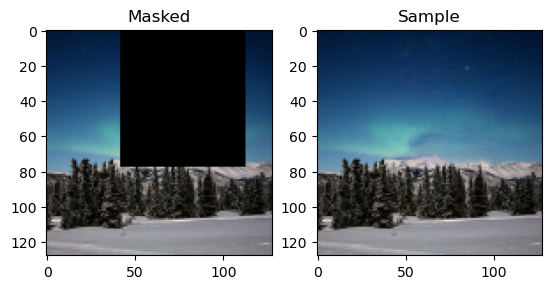

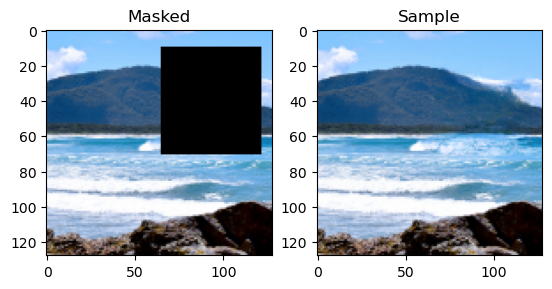

In [5]:
path_to_dataset = "/Users/gonzalo/Desktop/Samples_DM/Paint_LHQ/samples/"    
for idx in range(3):
        masked_path = os.path.join(path_to_dataset, "m_"+ str(idx) + ".png")
        sample_path = os.path.join(path_to_dataset, "s_"+ str(idx)+ ".png")
        mask = Image.open(masked_path)
        sample = Image.open(sample_path)
        fig, ax = plt.subplots(1, 2)  
        ax[0].imshow(mask)  
        ax[0].set_title('Masked')  
        ax[1].imshow(sample)  
        ax[1].set_title('Sample') 
        plt.show()

<u>**Joining Two Landscapes:**</u>

The inpainting model can also be used as a way to create a smooth transition between two different landscapes. However, there is a trade-off with respect to the size of the mask. The larger the mask is between them, the more space the model has to make the transition happen. Nevertheless, this will also provide less conditioning information, resulting in worse sample quality and the creation of unrealistic landscapes.

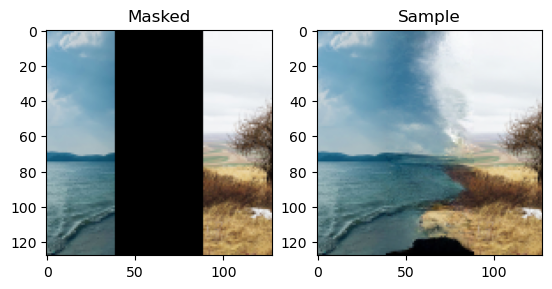

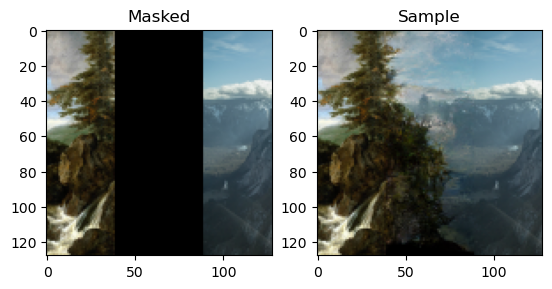

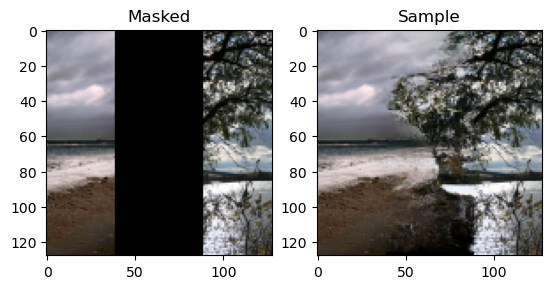

In [6]:
path_to_dataset = "/Users/gonzalo/Desktop/Samples_DM/Paint_LHQ/smooth/"    
for idx in range(3):
        masked_path = os.path.join(path_to_dataset, "m_"+ str(idx) + ".png")
        sample_path = os.path.join(path_to_dataset, "s_"+ str(idx)+ ".png")
        mask = Image.open(masked_path)
        sample = Image.open(sample_path)
        fig, ax = plt.subplots(1, 2)  
        ax[0].imshow(mask)  
        ax[0].set_title('Masked')  
        ax[1].imshow(sample)  
        ax[1].set_title('Sample') 
        plt.show()

<u>**Full Mask Input:**</u>

In most cases, when given a full black mask as input, the diffusion model just returns the black image. On rare occasions, as shown below, it will generate an image resembling a landscape in the early morning or at night. This reveals to us that the model is heavily reliant on the outside context that is provided around the mask.

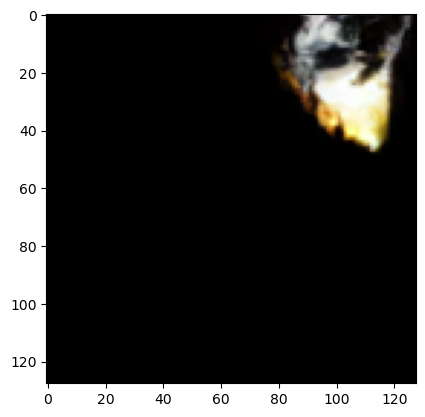

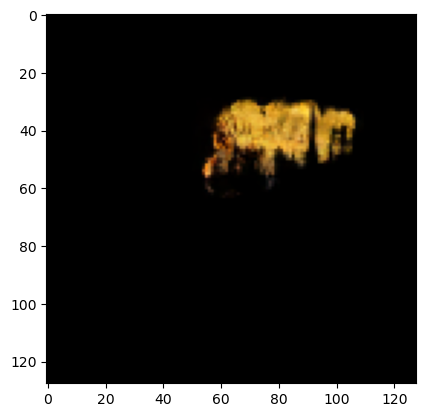

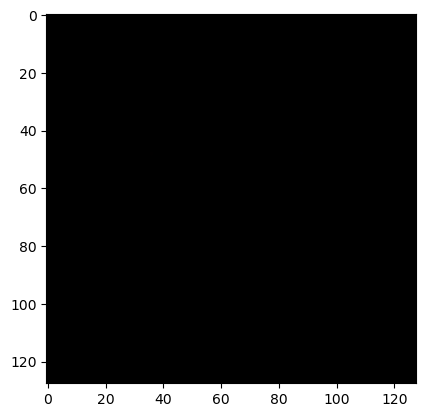

In [7]:
path_to_dataset = "/Users/gonzalo/Desktop/Samples_DM/Paint_LHQ/black/"
image_files = os.listdir(path_to_dataset)
for idx in range(3):
    img_path = os.path.join(path_to_dataset, image_files[idx])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()

<u>**Only Border Pixels:**</u>

Here we can observe that even by just providing slight border pixels, the model will try to generate a landscape consistent with them. However, to create coherent and realistic landscapes, more context is needed. If provided with little conditioning information, its synthesizing capabilities are visibly lacking.

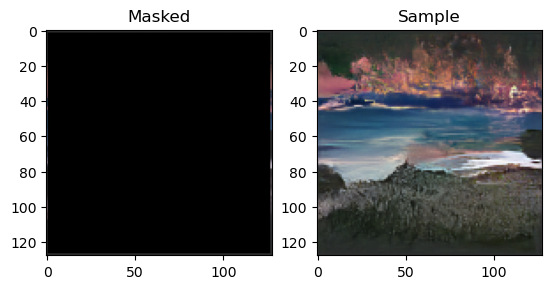

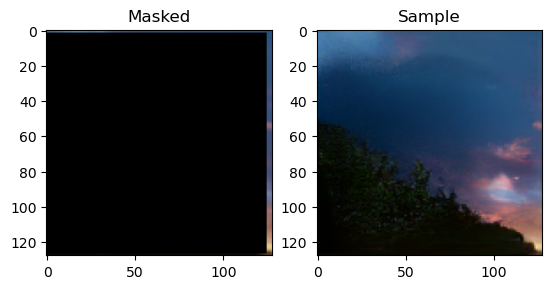

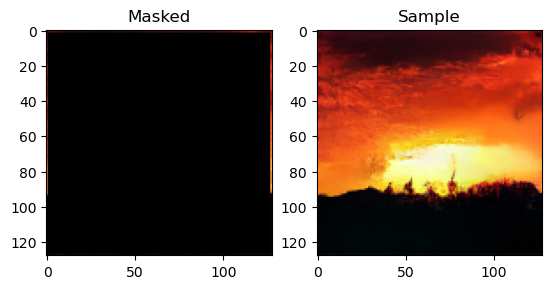

In [8]:
path_to_dataset = "/Users/gonzalo/Desktop/Samples_DM/Paint_LHQ/border/"    
for idx in range(3):
        masked_path = os.path.join(path_to_dataset, "m_"+ str(idx) + ".png")
        sample_path = os.path.join(path_to_dataset, "s_"+ str(idx)+ ".png")
        mask = Image.open(masked_path)
        sample = Image.open(sample_path)
        fig, ax = plt.subplots(1, 2)  
        ax[0].imshow(mask)  
        ax[0].set_title('Masked')  
        ax[1].imshow(sample)  
        ax[1].set_title('Sample') 
        plt.show()

<u>**Two Masks:**</u>

The inpainting model was trained exclusively on single rectangles that are randomly drawn at training time. We see that the model is able to differentiate which parts of the image shall remain the same and which parts of the image are deemed as the part of the mask (painted in black). This allows the model to generalize and inpaint images that contain multiple masks.

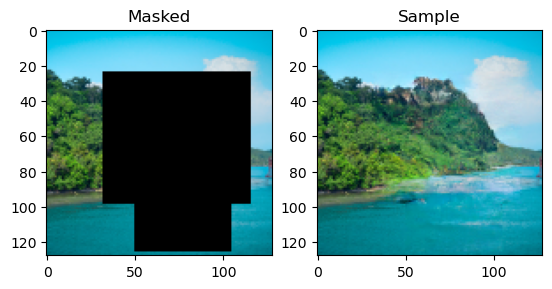

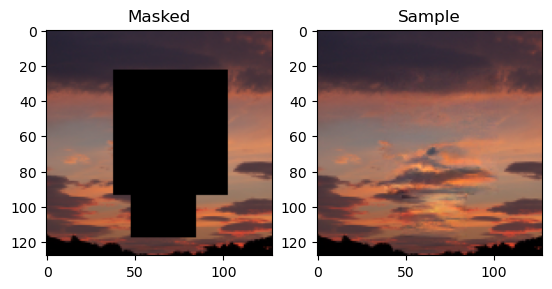

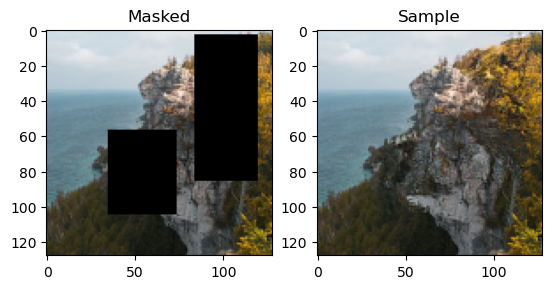

In [9]:
path_to_dataset = "/Users/gonzalo/Desktop/Samples_DM/Paint_LHQ/two_boxes/"    
for idx in range(3):
        masked_path = os.path.join(path_to_dataset, "m_"+ str(idx) + ".png")
        sample_path = os.path.join(path_to_dataset, "s_"+ str(idx)+ ".png")
        mask = Image.open(masked_path)
        sample = Image.open(sample_path)
        fig, ax = plt.subplots(1, 2)  
        ax[0].imshow(mask)  
        ax[0].set_title('Masked')  
        ax[1].imshow(sample)  
        ax[1].set_title('Sample') 
        plt.show()

<u>**Pepper Noise:**</u>

Since the model is able to generalize to multiple masks, we now look at pushing this idea to its extreme. By maximizing the number and minimizing the size of the masks drawn, we show what happens when applying 900 black pixels to an image. Unfortunately, the diffusion model does not consider them as masks and simply returns the input image. This might also be a side effect of how we trained the inpainter. As previously shown, to avoid unnecessarily small or thin masks, we fixed the minimum height and width of the black rectangles to 30 pixels. The model might have inferred that any agglomeration of black pixels under 30x30px shall not be inpainted.

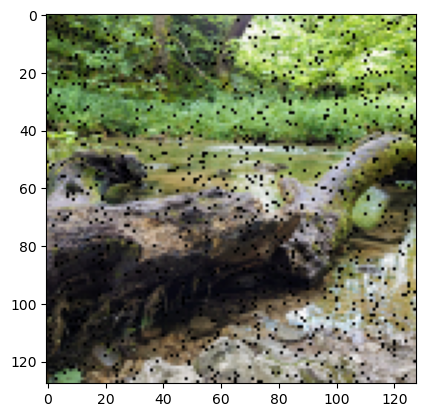

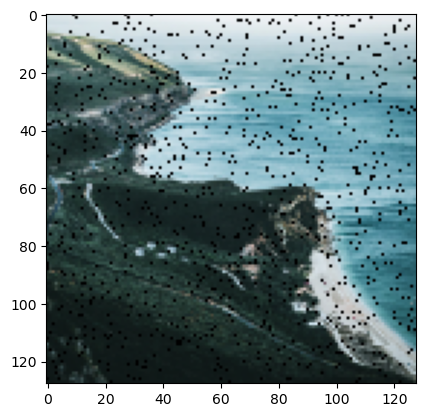

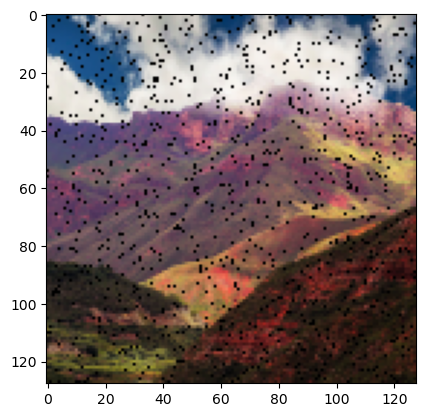

In [10]:
path_to_dataset = "/Users/gonzalo/Desktop/Samples_DM/Paint_LHQ/noise/"
image_files = os.listdir(path_to_dataset)
for idx in range(3):
    img_path = os.path.join(path_to_dataset, image_files[idx])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()